# Tree Models
### Author: Jainam Mehta

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data and prepare it for the RandomForest Model

In [142]:
# Load the data
df = pd.read_csv("Data/data.csv")
df.head()

,id,hos2_is_superhos2,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,property_type,room_type,accommodates,...,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2595,1,6,Midtown,Manhattan,New York,10018,Apartment,Entire home/apt,1,...,1125.0,48,7,94,9,9,10,10,10,9
1,3831,1,1,Clinton Hill,Brooklyn,Brooklyn,11238,Guest suite,Entire home/apt,3,...,730.0,295,75,90,9,9,10,9,10,9
2,5099,1,1,Murray Hill,Manhattan,New York,10016,Apartment,Entire home/apt,2,...,21.0,78,8,90,10,9,10,10,10,9
3,5178,1,1,Hell's Kitchen,Manhattan,New York,10019,Apartment,Private room,2,...,14.0,454,47,84,9,7,9,9,10,8
4,5238,2,4,Chinatown,Manhattan,New York,10002,Apartment,Entire home/apt,3,...,1125.0,161,9,94,10,9,10,10,9,9


In [143]:
# Descriptive statistics for each column
df.describe()

,id,hos2_is_superhos2,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,...,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.826800e+04,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,...,2.826800e+04,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000
mean,2.298458e+07,1.312509,8.427268,2.953976,1.134339,1.186819,1.600255,129.525647,1.641326,5.757677,...,1.038668e+04,39.998054,16.066648,94.032510,9.636939,9.328216,9.759764,9.751097,9.609276,9.395323
std,1.215285e+07,0.463524,56.331599,1.870513,0.391389,0.722178,1.146669,85.643423,1.212901,15.842635,...,6.733807e+05,56.912793,18.678909,8.043051,0.793117,0.974955,0.681790,0.722382,0.695249,0.877691
min,2.595000e+03,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,...,1.000000e+00,1.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.364244e+07,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,68.000000,1.000000,1.000000,...,2.900000e+01,5.000000,3.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.502626e+07,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,100.000000,1.000000,2.000000,...,3.650000e+02,17.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.361199e+07,2.000000,3.000000,4.000000,1.000000,1.000000,2.000000,168.000000,2.000000,4.000000,...,1.125000e+03,51.000000,24.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.051312e+07,2.000000,1767.000000,16.000000,7.000000,21.000000,26.000000,500.000000,16.000000,1125.000000,...,4.948122e+07,675.000000,407.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [144]:
# drop unecessary columns
df = df.drop(['neighbourhood_cleansed', 'city', 'security_deposit', 'cleaning_fee', 'extra_people'], axis=1)
df.columns
#df = df.drop(['neighbourhood_cleansed', 'city', 'zipcode', 'security_deposit', 'cleaning_fee', 'extra_people'], axis=1)
#df.columns

Index(['id', 'hos2_is_superhos2', 'host_listings_count',
       'neighbourhood_group_cleansed', 'zipcode', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'guests_included', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [145]:
# remove non-numeric zipcodes
df = df[df['zipcode'].str.isnumeric()].reset_index(drop=True)
df['zipcode'] = df['zipcode'].astype(int)
df['zipcode'].count() # remaining rows (we only lose 29 rows)

28239

**Handling the amenities**

In [146]:
# split up amenities
amenities_df = df[['id', 'amenities', 'price', 'number_of_reviews']].copy()
amenities_df['amenities_list'] = [x[1:-1].replace("'",'').replace('"', '').replace(' ', '').split(',') 
                                   for x in amenities_df['amenities']]

amenities_df.head()

,id,amenities,price,number_of_reviews,amenities_list
0,2595,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,48,"[TV, Wifi, Airconditioning, Kitchen, Paidparki..."
1,3831,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,295,"[TV, CableTV, Internet, Wifi, Airconditioning,..."
2,5099,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,78,"[TV, CableTV, Internet, Wifi, Airconditioning,..."
3,5178,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",79,454,"[TV, Wifi, Airconditioning, Paidparkingoffprem..."
4,5238,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",150,161,"[TV, CableTV, Wifi, Airconditioning, Kitchen, ..."


In [147]:
# Find all distinct amenities & calculate amenity coverages
all_amenities = []
for n in amenities_df['amenities_list']:
    all_amenities += n
all_amenities = np.unique(np.array(all_amenities),return_counts = 1)
all_amenities = pd.Series(all_amenities[1]/df.shape[0], index = all_amenities[0])
all_amenities = all_amenities.sort_values(ascending = False)

In [148]:
# Total 130 amenities
a_list = all_amenities.index # This list will be used to create columns
len(a_list)

130

In [149]:
range(amenities_df.shape[0])
amenities_df['id'][4406:4409]

4406    6969011
4407    6973286
4408    6974728
Name: id, dtype: int64

In [150]:
N = amenities_df.shape[0]
amenities_bin = [0]*N
for i in range(N):
    candidate = amenities_df['amenities_list'][i]
    amenities_bin[i] = [n in candidate for n in a_list]
    if i%10000 == 0:
        print("{} rows completed".format(i))

0 rows completed
10000 rows completed
20000 rows completed


In [151]:
# Combine binary variables with the amenity dataframe
col_names = 'amenities_' + all_amenities.index # This list will be used to create columns
amenities_df = pd.concat([amenities_df, pd.DataFrame(amenities_bin, columns = col_names).astype('int')], axis = 1)

amenities_df.head()

,id,amenities,price,number_of_reviews,amenities_list,amenities_Wifi,amenities_Essentials,amenities_Heating,amenities_Smokedetector,amenities_Kitchen,...,amenities_,amenities_Ski-in/Ski-out,amenities_Privatebathroom,amenities_Washer/Dryer,amenities_Groundflooraccess,amenities_Mobilehoist,amenities_Poolwithpoolhoist,amenities_Ceilinghoist,amenities_Airpurifier,amenities_Kitchenette
0,2595,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,48,"[TV, Wifi, Airconditioning, Kitchen, Paidparki...",1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,3831,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,295,"[TV, CableTV, Internet, Wifi, Airconditioning,...",1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,5099,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,78,"[TV, CableTV, Internet, Wifi, Airconditioning,...",1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,5178,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",79,454,"[TV, Wifi, Airconditioning, Paidparkingoffprem...",1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5238,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",150,161,"[TV, CableTV, Wifi, Airconditioning, Kitchen, ...",1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [152]:
amenities_df.shape

(28239, 135)

In [153]:
# Export as csv file
amenities_df.to_csv('Data/amenities_df.csv') 

In [154]:
# Drop amenities column from main df and add dummified amenities
df = df.drop('amenities', axis=1)
df = pd.concat([df, pd.DataFrame(amenities_bin, columns = col_names).astype('int')], axis = 1)
df.head()

,id,hos2_is_superhos2,host_listings_count,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities_,amenities_Ski-in/Ski-out,amenities_Privatebathroom,amenities_Washer/Dryer,amenities_Groundflooraccess,amenities_Mobilehoist,amenities_Poolwithpoolhoist,amenities_Ceilinghoist,amenities_Airpurifier,amenities_Kitchenette
0,2595,1,6,Manhattan,10018,Apartment,Entire home/apt,1,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,3831,1,1,Brooklyn,11238,Guest suite,Entire home/apt,3,1.0,1,...,0,0,0,0,0,0,0,0,0,0
2,5099,1,1,Manhattan,10016,Apartment,Entire home/apt,2,1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,5178,1,1,Manhattan,10019,Apartment,Private room,2,1.0,1,...,0,0,0,0,0,0,0,0,0,0
4,5238,2,4,Manhattan,10002,Apartment,Entire home/apt,3,1.0,1,...,0,0,0,0,0,0,0,0,0,0


### Create train/test split

In [155]:
# Split data into dependent and predictor variables
y = df['price']
print(y.head())

X = df.drop('price', axis=1)
X.head()

0    225
1     89
2    200
3     79
4    150
Name: price, dtype: int64


,id,hos2_is_superhos2,host_listings_count,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities_,amenities_Ski-in/Ski-out,amenities_Privatebathroom,amenities_Washer/Dryer,amenities_Groundflooraccess,amenities_Mobilehoist,amenities_Poolwithpoolhoist,amenities_Ceilinghoist,amenities_Airpurifier,amenities_Kitchenette
0,2595,1,6,Manhattan,10018,Apartment,Entire home/apt,1,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,3831,1,1,Brooklyn,11238,Guest suite,Entire home/apt,3,1.0,1,...,0,0,0,0,0,0,0,0,0,0
2,5099,1,1,Manhattan,10016,Apartment,Entire home/apt,2,1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,5178,1,1,Manhattan,10019,Apartment,Private room,2,1.0,1,...,0,0,0,0,0,0,0,0,0,0
4,5238,2,4,Manhattan,10002,Apartment,Entire home/apt,3,1.0,1,...,0,0,0,0,0,0,0,0,0,0


In [156]:
# one-hot encode the data 
X = pd.get_dummies(X)
predictor_list = X.columns.tolist()

# check the columns have been dummified
X.iloc[:, 155:165].head(10)

,amenities_Kitchenette,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast
0,0,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0
3,0,0,0,1,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1,0,0
5,0,0,0,1,0,0,0,1,0,0
6,0,0,1,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,1,0,0
8,0,0,0,1,0,0,0,1,0,0
9,0,0,1,0,0,0,0,0,0,0


In [157]:
# check dimensions
print(y.shape)
X.shape

(28239,)


(28239, 199)

In [199]:
# covert to numpy arrays
#y = np.array(y)
#X = np.array(X)

In [159]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size = 0.7, random_state = 123)

In [160]:
# check dimensions of resulting split
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (19767, 199)
Training Labels Shape: (19767,)
Testing Features Shape: (8472, 199)
Testing Labels Shape: (8472,)


### Training the model

In [161]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 123)

# Train the model on training data
rf.fit(X_train, y_train);

print('Training R2:', round(rf.score(X_train, y_train), 3))

Training R2: 0.956


### Generating predictions on the test set

In [162]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

### Performance metrics

In [163]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Avg error: $', round(np.mean(errors), 2))

Avg error: $ 31.19


In [166]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

# Calculate R2 value
r2 = rf.score(X_test, y_test)
print('R2:', round(r2, 3))

Accuracy: 72.27 %.
R2: 0.682


### Checking for predictor importance

In [192]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(predictor_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_importances = pd.DataFrame(feature_importances, columns=['feature', 'importance'])

Variable: room_type_Entire home/apt Importance: 0.33
Variable: zipcode              Importance: 0.12
Variable: bathrooms            Importance: 0.07
Variable: bedrooms             Importance: 0.05
Variable: accommodates         Importance: 0.04
Variable: id                   Importance: 0.03
Variable: number_of_reviews    Importance: 0.02
Variable: host_listings_count  Importance: 0.01
Variable: beds                 Importance: 0.01
Variable: guests_included      Importance: 0.01
Variable: minimum_nights       Importance: 0.01
Variable: maximum_nights       Importance: 0.01
Variable: minimum_minimum_nights Importance: 0.01
Variable: maximum_minimum_nights Importance: 0.01
Variable: minimum_maximum_nights Importance: 0.01
Variable: minimum_nights_avg_ntm Importance: 0.01
Variable: number_of_reviews_ltm Importance: 0.01
Variable: review_scores_rating Importance: 0.01
Variable: review_scores_cleanliness Importance: 0.01
Variable: review_scores_location Importance: 0.01
Variable: amenities

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


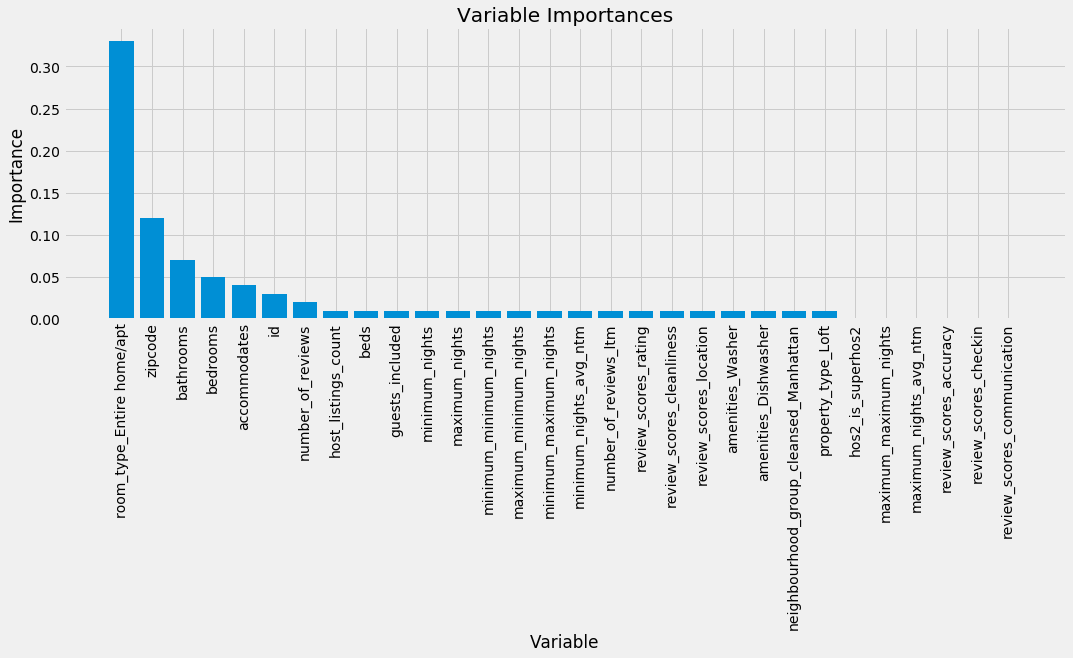

In [195]:
# Plot out importances

# Import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,5))

top_n = 30

# Make a bar chart
plt.bar(range(top_n), feature_importances['importance'][:top_n], orientation = 'vertical')

# Tick labels for x axis
plt.xticks(range(top_n), feature_importances['feature'][:top_n], rotation= 'vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

print(x_values)

In [175]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,5))
top_n = 30
plt.bar(range(top_n), feature_importances[''[:top_n], orientation = 'vertical')
plt.xticks(range(top_n), predictor_list[:top_n], rotation = 'vertical')
plt.title("Coverage of Amenities")
plt.show()

AttributeError: 'list' object has no attribute 'values'

<Figure size 1152x360 with 0 Axes>

In [177]:
all_amenities

Wifi             0.985835
Essentials       0.964730
Heating          0.964163
Smokedetector    0.910443
Kitchen          0.895499
dtype: float64

### Re-training the model with important predictors

In [219]:
# select only the most important predictors and recreate the model
important_cols = feature_importances[feature_importances['importance'] > 0]['feature'].tolist()

# Subset predictors with only the most important features
X_train_imp = X_train[important_cols]
X_test_imp = X_test[important_cols]

# Interesting to see that the id column actually had an important of 0.03
# However, we drop the id column, as that should have nothing to do with price.
X_train_imp = X_train_imp.drop('id', axis=1)
X_test_imp = X_test_imp.drop('id', axis=1)

In [221]:
# New random forest with only the most important variables
rf_imp = RandomForestRegressor(n_estimators = 1000, random_state = 123)

# Train the random forest
rf_imp.fit(X_train_imp, y_train)

print('Training R2:', round(rf_imp.score(X_train_imp, y_train), 3))

Training R2: 0.948


In [222]:
# Make predictions and determine the error
predictions = rf_imp.predict(X_test_imp) 

In [223]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Display the performance metrics
print('Avg error: $', round(np.mean(errors), 2))

mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

r2 = rf_imp.score(X_test_imp, y_test)
print('R2:', round(r2, 3))

Avg error: $ 35.3
Accuracy: 68.25 %.
R2: 0.613


### Interpreting the model and results

In [ ]:
# Plot predictions vs actual, grouped by location

In [ ]:
# Plot predictions vs actual, grouped by room type

In [25]:
# Visualizing a single tree

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = predictor_list, rounded = True, precision = 1)



FileNotFoundError: [WinError 2] "dot" not found in path.

In [26]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')


In [ ]:
# Write graph to a png file
graph.write_png('tree.png')